In [69]:
import pickle
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, precision_recall_curve,f1_score, fbeta_score
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
%matplotlib inline

In [6]:
with open('cleaned_data.pkl', 'rb' ) as f:
    houses = pickle.load( f)

In [7]:
houses

,Baths,Beds,Community,Favorites,Price_sqft,Redfin_Tours,Redfin_estimate,Style,Views,X-Outs,...,SqFt,Price_sqFt,age,Renovated,Recently_Renovated,date_sold,date_listed,days_on_market,neighborhood,over_under_ask
0,1.00,1,Seattle,67,$514,4,420723,Condo/Co-op,69.0,8,...,807,526.641884,41,1,0,2021-10-29,2021-09-10,49,South,-0.023529
1,2.50,4,Maple Leaf,368,$612,14,1485096,Single Family Residential,394.0,21,...,2540,529.527559,5,0,0,2021-10-29,2021-09-29,30,North,0.182156
2,3.25,5,Queen Anne,155,$699,6,2591427,Single Family Residential,344.0,8,...,3540,705.649718,100,1,0,2021-10-29,2021-09-30,29,Central Area,0.045837
3,2.75,5,Leschi,107,$403,2,1004132,Multi-Family,111.0,9,...,2610,382.712644,120,0,0,2021-10-27,2021-09-24,33,Central Area,0.101233
4,2.00,3,Mt Baker,133,$479,7,667592,Single Family Residential,88.0,32,...,1410,474.468085,26,0,0,2021-10-27,2021-09-16,41,South,0.008969
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2525,2.00,4,Madrona,46,$530,0,892042,Single Family Residential,115.0,38,...,1600,578.125000,55,0,0,2021-10-29,2021-09-08,51,Central Area,-0.082432
2526,1.00,5,Ballard,66,$921,0,1188252,Single Family Residential,135.0,18,...,1330,894.736842,91,0,0,2021-10-29,2021-09-04,55,Ballard,0.029412
2527,1.00,2,Green Lake,240,$533,6,790685,Single Family Residential,136.0,25,...,1040,673.076923,66,0,0,2021-10-29,2021-09-23,36,Fremont,0.042857
2528,3.25,3,Matthews Beach,174,"$1,056",1,2749510,Single Family Residential,273.0,7,...,2680,1025.373134,26,0,0,2021-10-29,2021-09-27,32,South,0.029840


In [8]:
houses['target'] = np.where(houses['over_under_ask'] > 0, 1, 0)

In [11]:
houses['target'].value_counts()

1    742
0    573
Name: target, dtype: int64

In [15]:
houses['neighborhood'].unique()

array(['South', 'North', 'Central Area', 'Ballard', 'West Seattle',
       'Downtown', 'Fremont', 'Bellevue', 'Kirkland'], dtype=object)

In [91]:
houses['Redfin_estimate_to_list'] = houses['Listed_Price'] - houses['Redfin_estimate']

In [92]:
df = houses[['Baths', 'Beds',  'Favorites',  'Redfin_Tours', 'Style', 'Views', 'X-Outs', 
       'Listed_Price', 'avg_school_rating', 'SqFt', 'Price_sqFt', 'age', 'days_on_market', 'neighborhood','target', 'Redfin_estimate_to_list']]

In [93]:
df = pd.get_dummies(df, drop_first = True)

In [94]:
# Split into train, val, and test
X, X_test, y, y_test = train_test_split(df.drop(['target'], 1), df['target'], 
                                        test_size=.2, random_state=30)

In [95]:
#MVP: Logistic Regression
lm = LogisticRegression()
lm.fit(X, y)
y_pred = lm.predict(X_test)
print("Precision", precision_score(y_test,y_pred))
print("Recall", recall_score(y_test,y_pred))
print("Accuracy", lm.score(X_test,y_test))
print("F1 Score", f1_score(y_test,y_pred))

Precision 0.8698630136986302
Recall 0.7888198757763976
Accuracy 0.7984790874524715
F1 Score 0.8273615635179155


In [96]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X, y)
y_pred = knn.predict(X_test)
print("Precision", precision_score(y_test,y_pred))
print("Recall", recall_score(y_test,y_pred))
print("Accuracy", lm.score(X_test,y_test))
print("F1 Score", f1_score(y_test,y_pred))

Precision 0.8402366863905325
Recall 0.8819875776397516
Accuracy 0.7984790874524715
F1 Score 0.8606060606060606


In [97]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X,y)
y_pred = rf.predict(X_test)
print("Precision", precision_score(y_test,y_pred))
print("Recall", recall_score(y_test,y_pred))
print("Accuracy", rf.score(X_test,y_test))
print("F1 Score", f1_score(y_test,y_pred))

Precision 0.9259259259259259
Recall 0.9316770186335404
Accuracy 0.9125475285171103
F1 Score 0.9287925696594428


In [98]:
gbm = xgb.XGBClassifier( 
                       n_estimators=30000, #arbitrary large number
                       objective = 'binary:logistic',
                       max_depth=3,
                       learning_rate=.1, 
                       subsample=1,
                       min_child_weight=1,
                       colsample_bytree=.8
                      )


In [99]:
fit_model = gbm.fit( X, y)

C:\Users\salma.katri\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:40:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [100]:
y_pred = gbm.predict(X_test, ntree_limit=gbm.best_ntree_limit)
#accuracy_score(y_test, gbm.predict(X_test, ntree_limit=gbm.best_ntree_limit)) 

C:\Users\salma.katri\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:108: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  UserWarning


In [101]:
print("Precision", precision_score(y_test,y_pred))
print("Recall", recall_score(y_test,y_pred))
print("Accuracy", gbm.score(X_test,y_test))
print("F1 Score", f1_score(y_test,y_pred))

Precision 0.9375
Recall 0.9316770186335404
Accuracy 0.9201520912547528
F1 Score 0.9345794392523364


In [111]:
rfc = RandomForestClassifier(random_state=42)

param_grid = { 
    'n_estimators': [100, 200, 300, 400, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8, 10],
    'criterion' :['gini', 'entropy']
}

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5, scoring = 'recall')
CV_rfc.fit(X, y)
CV_rfc.best_params_
y_pred = CV_rfc.predict(X_test)
print("Precision", precision_score(y_test,y_pred))
print("Recall", recall_score(y_test,y_pred))
print("Accuracy", CV_rfc.score(X_test,y_test))
print("F1 Score", f1_score(y_test,y_pred))

Precision 0.9161676646706587
Recall 0.9503105590062112
Accuracy 0.9503105590062112
F1 Score 0.9329268292682927


In [103]:
CV_rfc.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'max_features': 'auto',
 'n_estimators': 200}

In [104]:
rf = RandomForestClassifier(n_estimators=200, max_depth = 10, max_features = 'auto', criterion = 'entropy')
rf.fit(X,y)
y_pred = rf.predict(X_test)
print("Precision", precision_score(y_test,y_pred))
print("Recall", recall_score(y_test,y_pred))
print("Accuracy", rf.score(X_test,y_test))
print("F1 Score", f1_score(y_test,y_pred))

Precision 0.9166666666666666
Recall 0.9565217391304348
Accuracy 0.9201520912547528
F1 Score 0.9361702127659574


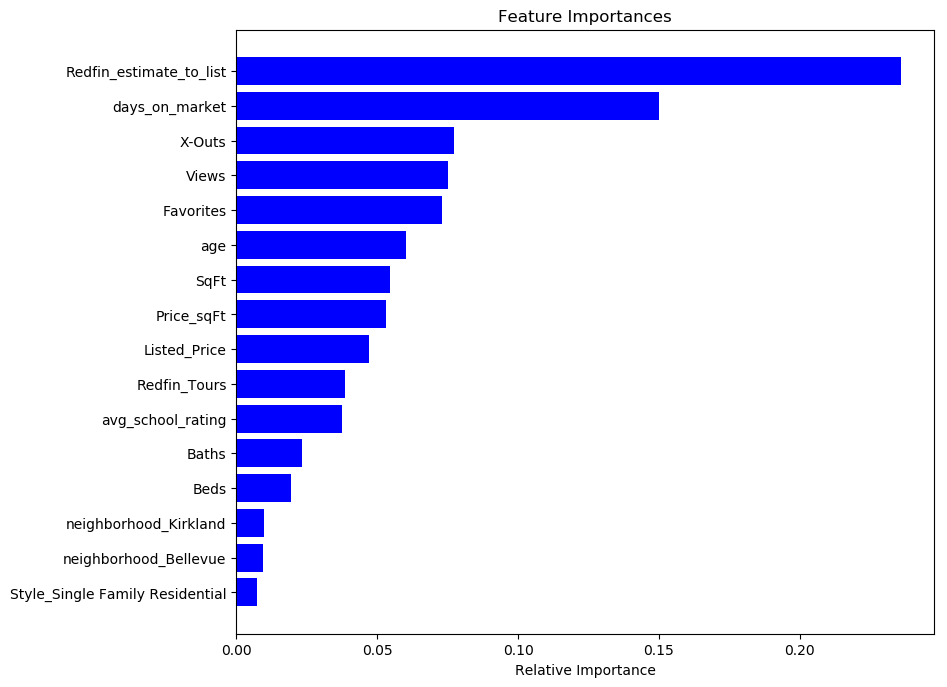

In [108]:
from matplotlib.pyplot import figure

figure(figsize=(9, 8), dpi=100)

features = X.columns
importances = rf.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)-8), importances[indices][8:], color='b', align='center')
plt.yticks(range(len(indices)-8), [features[i] for i in indices[8:]])
plt.xlabel('Relative Importance')
plt.show()

(array([0.01918219, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.03836438,
        0.15345753, 0.4411904 , 0.63301232, 1.45784655, 3.39524788,
        9.1307231 , 3.22260815, 1.64966846, 1.61130408, 1.07420272,
        0.93992738, 0.74810546, 0.21100411, 0.36446164, 0.03836438,
        0.01918219, 0.01918219, 0.03836438, 0.        , 0.01918219]),
 array([-0.59770115, -0.55805728, -0.51841341, -0.47876954, -0.43912568,
        -0.39948181, -0.35983794, -0.32019407, -0.2805502 , -0.24090633,
        -0.20126246, -0.1616186 , -0.12197473, -0.08233086, -0.04268699,
        -0.00304312,  0.03660075,  0.07624462,  0.11588848,  0.15553235,
         0.19517622,  0.23482009,  0.27446396,  0.31410783,  0.3537517 ,
         0.39339556,  0.43303943,  0.4726833 ,  0.51232717,  0.55197104,
         0.59161491]),
 <a list of 30 Patch objects>)

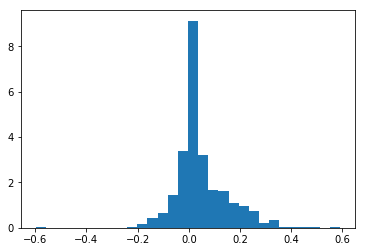

In [110]:
plt.hist(houses['over_under_ask'], density=True, bins=30)